In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df=pd.read_json('Pathao/queue_system_sqlite3.db.json')

In [11]:
df.head()

,id,queue_id,service_id,counter_id,user_id,token_letter,token_number,called_date,started_at,ended_at,waiting_time,served_time,turn_around_time,created_at,updated_at,call_status_id
0,28,45,1,2,2,W,1,2024-01-25,2024-01-25 18:26:13,2024-01-25 18:34:14,2024-07-27 00:06:45,2024-07-27 00:08:01,2024-07-27 00:14:46,2024-01-25 18:34:01,2024-01-25 18:34:14,1.0
1,29,46,1,2,2,W,2,2024-01-25,2024-01-25 18:34:16,2024-01-25 18:34:24,2024-07-27 00:13:39,2024-07-27 00:00:08,2024-07-27 00:13:47,2024-01-25 18:34:16,2024-01-25 18:34:24,1.0
2,30,48,2,2,2,NR,1,2024-01-25,2024-01-25 18:34:53,NaT,2024-07-27 00:00:13,NaT,NaT,2024-01-25 18:34:53,2024-01-25 18:34:53,NaN
3,31,47,1,2,2,W,3,2024-01-25,2024-01-25 18:35:14,2024-01-25 18:35:18,2024-07-27 00:10:17,2024-07-27 00:00:04,2024-07-27 00:10:21,2024-01-25 18:35:14,2024-01-25 18:35:18,1.0
4,32,50,3,3,2,T,1,2024-01-25,2024-01-25 18:35:58,2024-01-25 18:37:00,2024-07-27 00:00:29,2024-07-27 00:01:02,2024-07-27 00:01:31,2024-01-25 18:35:58,2024-01-25 18:37:00,1.0


In [13]:
df.describe()

,id,queue_id,service_id,counter_id,user_id,token_number,started_at,ended_at,waiting_time,served_time,turn_around_time,created_at,updated_at,call_status_id
count,3354.000000,3354.000000,3354.000000,3354.000000,3354.000000,3354.000000,3354,3335,3354,2737,2737,3354,3354,3335.000000
mean,1984.522660,1736.265653,1.598986,5.233154,8.946333,41.959451,2024-02-07 03:09:11.555754240,2024-02-07 03:54:37.490254592,2024-07-27 01:10:08.298151424,2024-07-27 00:12:12.123127552,2024-07-27 01:21:12.068688384,2024-02-07 03:09:45.271616,2024-02-07 03:19:30.821705728,1.179310
min,28.000000,45.000000,1.000000,1.000000,2.000000,1.000000,2024-01-25 18:26:13,2024-01-25 18:34:14,2024-07-27 00:00:00,2024-07-27 00:00:01,2024-07-27 00:01:31,2024-01-25 18:34:01,2024-01-25 18:34:14,1.000000
25%,1011.500000,899.250000,1.000000,3.000000,6.000000,17.000000,2024-02-01 11:31:20.500000,2024-02-01 11:43:21,2024-07-27 00:29:31.249999872,2024-07-27 00:05:44,2024-07-27 00:39:49,2024-02-01 11:31:23.500000,2024-02-01 11:37:11.750000128,1.000000
50%,1946.500000,1737.500000,2.000000,5.000000,9.000000,39.500000,2024-02-07 15:27:28,2024-02-07 15:58:24,2024-07-27 01:02:42.500000,2024-07-27 00:10:50,2024-07-27 01:12:43,2024-02-07 15:27:28,2024-02-07 15:42:16.500000,1.000000
75%,2960.500000,2578.750000,2.000000,8.000000,12.000000,64.000000,2024-02-12 14:44:23.500000,2024-02-12 14:57:00.500000,2024-07-27 01:40:31.500000,2024-07-27 00:14:58,2024-07-27 01:52:16,2024-02-12 14:44:34.750000128,2024-02-12 14:56:01.500000,1.000000
max,4021.000000,3417.000000,3.000000,10.000000,15.000000,119.000000,2024-02-16 17:34:58,2024-02-16 17:53:11,2024-07-27 04:55:13,2024-07-27 03:03:44,2024-07-27 05:18:21,2024-02-16 17:37:49,2024-02-16 17:53:11,2.000000
std,1135.376866,973.158385,0.619216,2.916252,3.247718,28.310359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.383669


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3354 entries, 0 to 3353
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                3354 non-null   int64         
 1   queue_id          3354 non-null   int64         
 2   service_id        3354 non-null   int64         
 3   counter_id        3354 non-null   int64         
 4   user_id           3354 non-null   int64         
 5   token_letter      3354 non-null   object        
 6   token_number      3354 non-null   int64         
 7   called_date       3354 non-null   datetime64[ns]
 8   started_at        3354 non-null   datetime64[ns]
 9   ended_at          3335 non-null   datetime64[ns]
 10  waiting_time      3354 non-null   float64       
 11  served_time       2737 non-null   datetime64[ns]
 12  turn_around_time  2737 non-null   datetime64[ns]
 13  created_at        3354 non-null   datetime64[ns]
 14  updated_at        3354 n

Visualizing the missing values in the DataFrame

<Axes: >

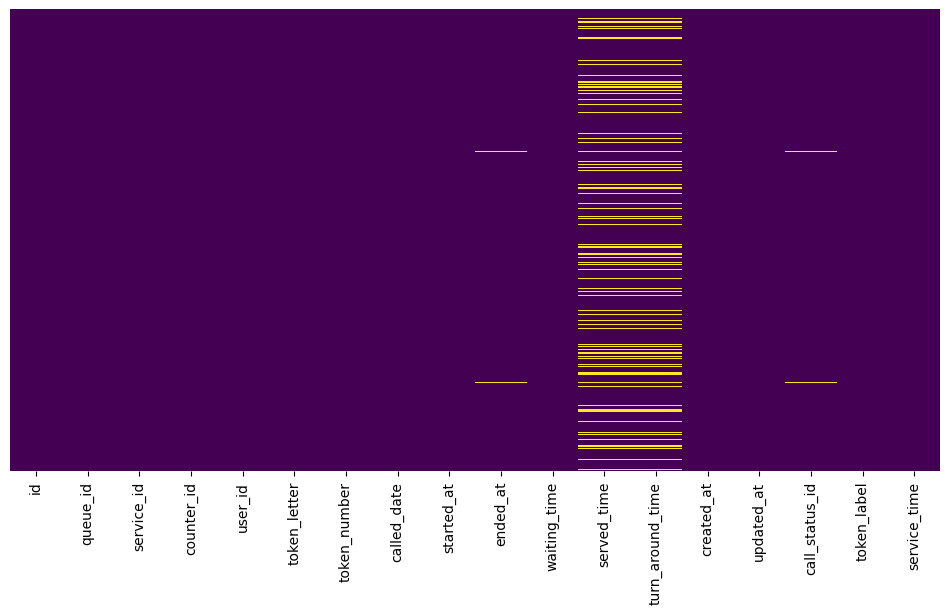

In [202]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [204]:
df1=pd.read_json('Pathao/queue_system_sqlite3.db (7).json')
df1.head()

,id,service_id,number,called,reference_no,letter,name,email,phone,position,created_at,updated_at
0,45,1,1,1,wzkYsTk40,W,NaN,NaN,NaN,0,2024-01-25 18:19:28,2024-01-25 18:26:13
1,46,1,2,1,DZYdzvM4P,W,NaN,NaN,NaN,0,2024-01-25 18:20:37,2024-01-25 18:34:16
2,47,1,3,1,old87iht8,W,NaN,NaN,NaN,0,2024-01-25 18:24:57,2024-01-25 18:35:14
3,48,2,1,1,3BAWSsH6r,NR,NaN,NaN,NaN,0,2024-01-25 18:34:40,2024-01-25 18:34:53
4,49,2,2,1,JI70zb9z2,NR,NaN,NaN,NaN,0,2024-01-25 18:34:45,2024-01-25 18:36:48


MergIng two DataFrames df and df1 based on a common column id 

In [207]:
final_df=pd.merge(df,df1,on='id', how='right')
final_df.head()


,id,queue_id,service_id_x,counter_id,user_id,token_letter,token_number,called_date,started_at,ended_at,...,number,called,reference_no,letter,name,email,phone,position,created_at_y,updated_at_y
0,45,60.0,1.0,2.0,13.0,W,3.0,2024-01-26,2024-01-26 10:21:32,2024-01-26 10:21:35,...,1,1,wzkYsTk40,W,NaN,NaN,NaN,0,2024-01-25 18:19:28,2024-01-25 18:26:13
1,46,63.0,1.0,2.0,13.0,W,4.0,2024-01-26,2024-01-26 10:21:37,2024-01-26 10:21:39,...,2,1,DZYdzvM4P,W,NaN,NaN,NaN,0,2024-01-25 18:20:37,2024-01-25 18:34:16
2,47,64.0,1.0,2.0,13.0,W,5.0,2024-01-26,2024-01-26 10:21:40,2024-01-26 10:21:42,...,3,1,old87iht8,W,NaN,NaN,NaN,0,2024-01-25 18:24:57,2024-01-25 18:35:14
3,48,68.0,1.0,2.0,13.0,W,6.0,2024-01-26,2024-01-26 10:21:43,2024-01-26 10:21:45,...,1,1,3BAWSsH6r,NR,NaN,NaN,NaN,0,2024-01-25 18:34:40,2024-01-25 18:34:53
4,49,71.0,1.0,2.0,13.0,W,7.0,2024-01-26,2024-01-26 10:21:47,2024-01-26 10:27:18,...,2,1,JI70zb9z2,NR,NaN,NaN,NaN,0,2024-01-25 18:34:45,2024-01-25 18:36:48


Mapping Token Letters to Descriptive Labels:

In [209]:
final_df['token_letter']
token_mapping = {'W': 'Walk-in', 'NR': 'Non-reserved', 'T': 'Telephonic'}
final_df['token_label'] = final_df['token_letter'].map(token_mapping)
final_df.sample()

,id,queue_id,service_id_x,counter_id,user_id,token_letter,token_number,called_date,started_at,ended_at,...,number,called,reference_no,letter,name,email,phone,position,created_at_y,updated_at_y
1636,1681,1499.0,1.0,7.0,8.0,W,20.0,2024-02-06,2024-02-06 11:31:36,2024-02-06 11:54:09,...,13,1,TBbycO9Zt,NR,NaN,NaN,NaN,0,2024-02-07 10:53:53,2024-02-07 11:49:31


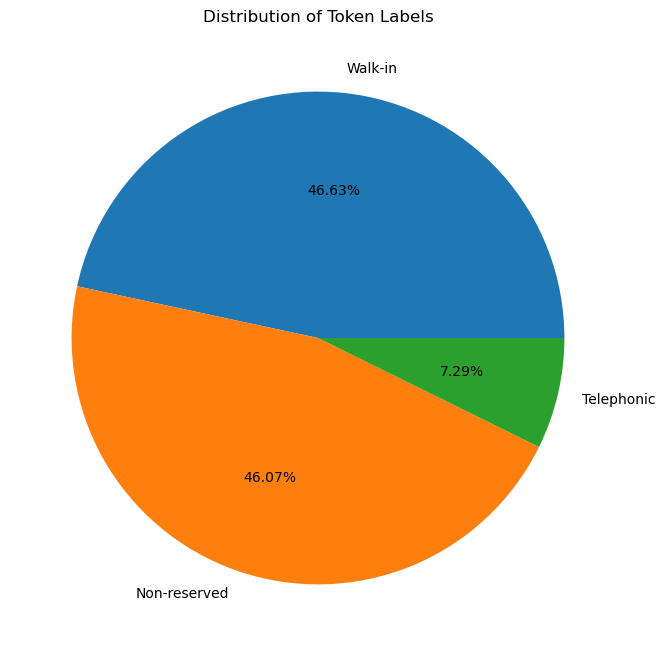

In [211]:
token_counts = final_df['token_label'].value_counts()
token_names = token_counts.index
token_values = token_counts.values
plt.figure(figsize=(8, 8))
plt.pie(token_values, labels=token_names, autopct='%1.2f%%')
plt.title('Distribution of Token Labels')
plt.show()

In [213]:
final_df.columns

Index(['id', 'queue_id', 'service_id_x', 'counter_id', 'user_id',
       'token_letter', 'token_number', 'called_date', 'started_at', 'ended_at',
       'waiting_time', 'served_time', 'turn_around_time', 'created_at_x',
       'updated_at_x', 'call_status_id', 'token_label', 'service_time',
       'service_id_y', 'number', 'called', 'reference_no', 'letter', 'name',
       'email', 'phone', 'position', 'created_at_y', 'updated_at_y'],
      dtype='object')

In [215]:
final_df.isnull().sum()

id                     0
queue_id             509
service_id_x         509
counter_id           509
user_id              509
token_letter         509
token_number         509
called_date          509
started_at           509
ended_at             525
waiting_time         509
served_time         1031
turn_around_time    1031
created_at_x         509
updated_at_x         509
call_status_id       525
token_label          509
service_time         509
service_id_y           0
number                 0
called                 0
reference_no           0
letter                 0
name                3374
email               3374
phone               3374
position               0
created_at_y           0
updated_at_y           0
dtype: int64

Detect and Remove Outliers

C:\Users\HP\AppData\Local\Temp\ipykernel_14004\1421018475.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df[['service_time','waiting_time']])
C:\Users\HP\Downloads\jupyter1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

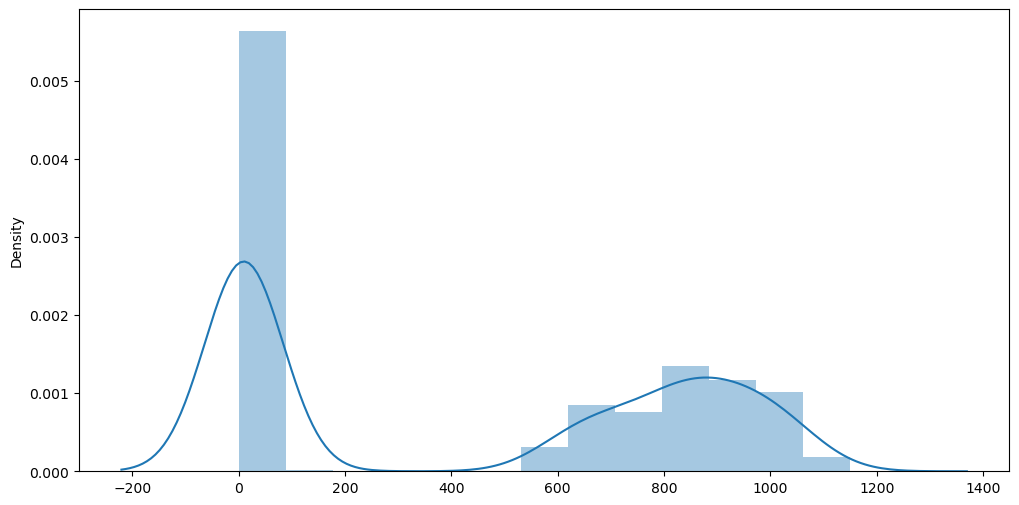

In [136]:
sns.distplot(final_df[['service_time','waiting_time']])

<Axes: >

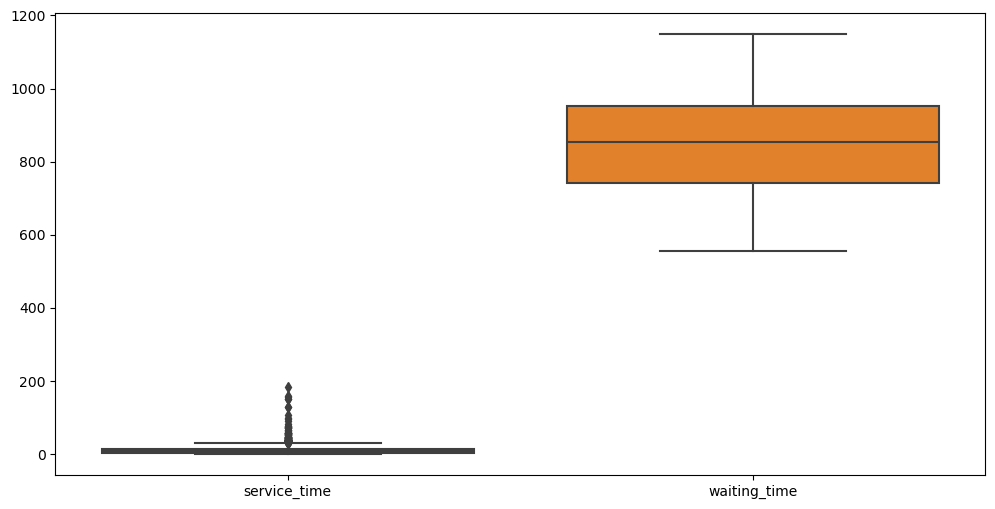

In [138]:
sns.boxplot(final_df[['service_time','waiting_time']])

Z-score method

In [143]:
upper_limit_service_time = final_df['service_time'].mean() + 3 * final_df['service_time'].std()
lower_limit_service_time = final_df['service_time'].mean() - 3 * final_df['service_time'].std()

print('Upper limit for service time:', upper_limit_service_time)
print('Lower limit for service time:', lower_limit_service_time)

Upper limit for service time: 45.664206599467505
Lower limit for service time: -24.90491624464492


In [253]:
final_df.loc[
    (final_df['service_time'] > upper_limit_service_time) |
    (final_df['service_time'] < lower_limit_service_time)
].head()

,id,queue_id,service_id_x,counter_id,user_id,token_letter,token_number,called_date,started_at,ended_at,...,number,called,reference_no,letter,name,email,phone,position,created_at_y,updated_at_y
41,86,89.0,1.0,1.0,5.0,W,18.0,2024-01-26,2024-01-26 11:45:24,2024-01-26 12:59:05,...,15,1,OIjMmDkWW,W,NaN,NaN,NaN,0,2024-01-26 11:05:25,2024-01-26 11:16:49
188,233,200.0,1.0,8.0,7.0,W,13.0,2024-01-28,2024-01-28 10:10:54,2024-01-28 12:47:22,...,16,1,yMlgXS7H4,NR,NaN,NaN,NaN,0,2024-01-28 11:10:47,2024-01-28 11:14:45
192,237,202.0,2.0,7.0,8.0,NR,6.0,2024-01-28,2024-01-28 10:12:46,2024-01-28 13:16:30,...,37,1,rppltvRSM,W,NaN,NaN,NaN,0,2024-01-28 11:15:59,2024-01-28 11:45:14
235,280,239.0,2.0,2.0,13.0,NR,18.0,2024-01-28,2024-01-28 11:29:26,2024-01-28 12:52:25,...,35,1,YqIeO1Uam,NR,NaN,NaN,NaN,0,2024-01-28 12:32:25,2024-01-28 13:38:32
237,282,242.0,2.0,8.0,7.0,NR,20.0,2024-01-28,2024-01-28 11:39:25,2024-01-28 12:38:03,...,8,1,GohxMazGF,T,NaN,NaN,NaN,0,2024-01-28 12:34:16,2024-01-28 15:10:58


In [149]:
new_df = final_df.loc[
    (final_df['service_time'] <= upper_limit_service_time) &
    (final_df['service_time'] >= lower_limit_service_time)
]

# Print the number of rows before and after removing outliers
print('Before removing outliers:', len(final_df))
print('After removing outliers:', len(new_df))
print('Number of outliers removed:', len(final_df) - len(new_df))

Before removing outliers: 3374
After removing outliers: 3329
Number of outliers removed: 45


<Axes: >

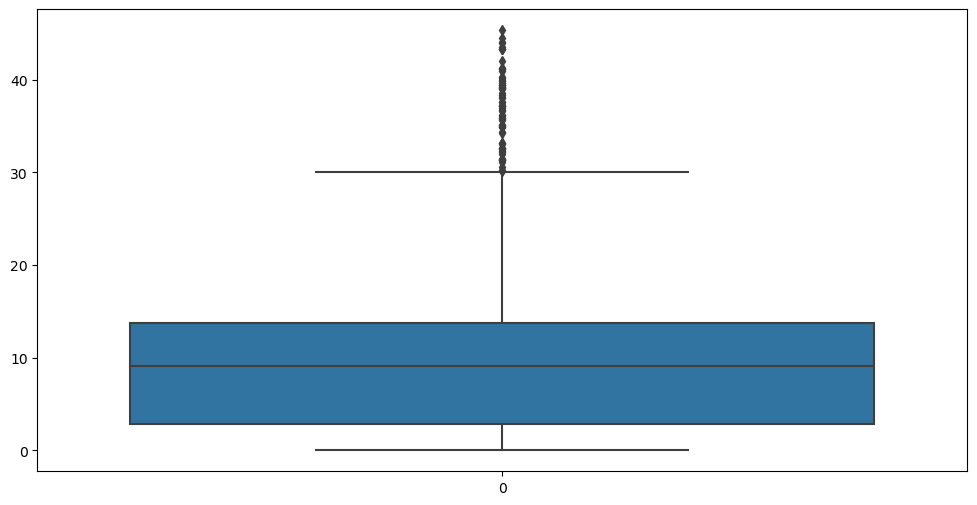

In [151]:
sns.boxplot(new_df['service_time'])


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '10.0')])

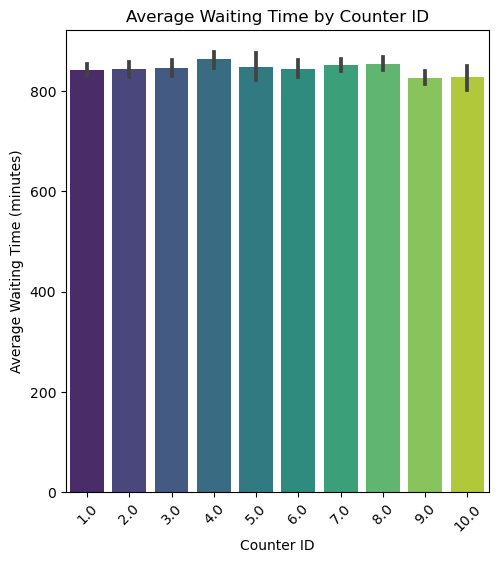

In [181]:
plt.subplot(1, 2, 1)
sns.barplot(x='counter_id', y='waiting_time', data=final_df, palette='viridis')
plt.title('Average Waiting Time by Counter ID')
plt.xlabel('Counter ID')
plt.ylabel('Average Waiting Time (minutes)')
plt.xticks(rotation=45)

High Bars:This indicates that customers generally have to wait longer at these counters.

Low Bars:This indicates that customers are typically served more quickly at these counters.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '10.0')])

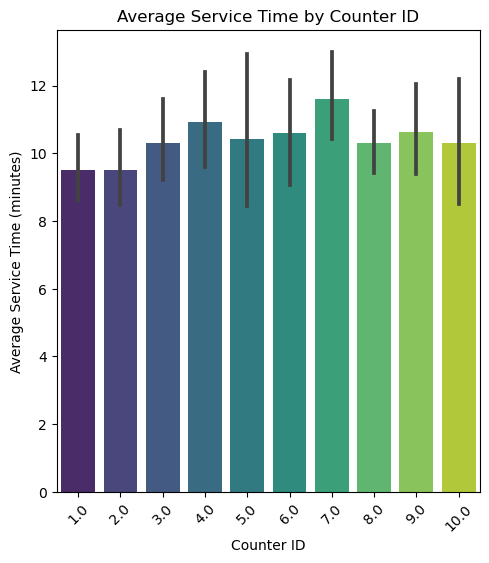

In [185]:
plt.subplot(1, 2, 2)
sns.barplot(x='counter_id', y='service_time', data=final_df, palette='viridis')
plt.title('Average Service Time by Counter ID')
plt.xlabel('Counter ID')
plt.ylabel('Average Service Time (minutes)')
plt.xticks(rotation=45)

High Bars:This means that it takes longer to serve customers at these counters.
    
Low Bars:This indicates that customers are served more quickly.

C:\Users\HP\Downloads\jupyter1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

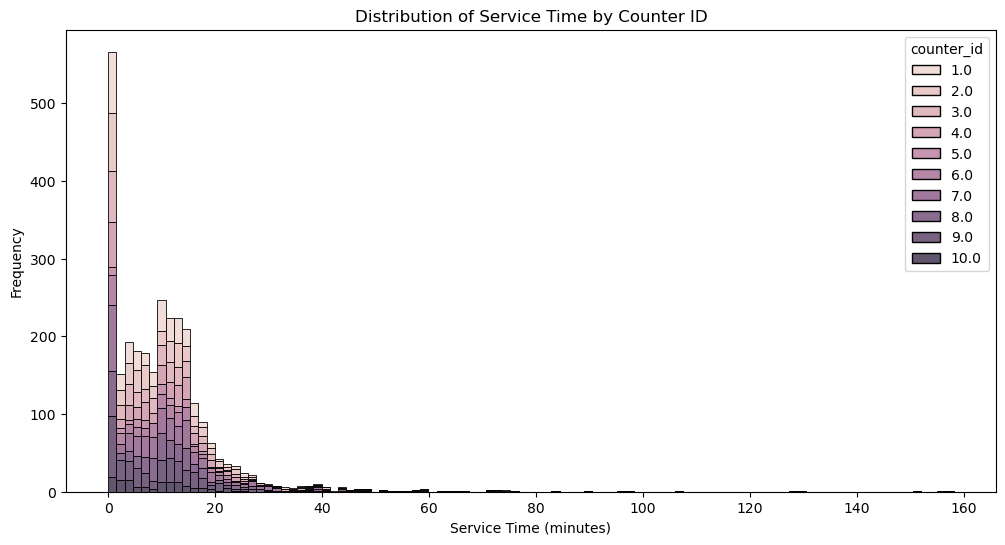

In [97]:
plt.figure(figsize=(12, 6))
sns.histplot(data=final_df, x='service_time', hue='counter_id', multiple='stack')
plt.title('Distribution of Service Time by Counter ID')
plt.xlabel('Service Time (minutes)')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Service Time (minutes)')

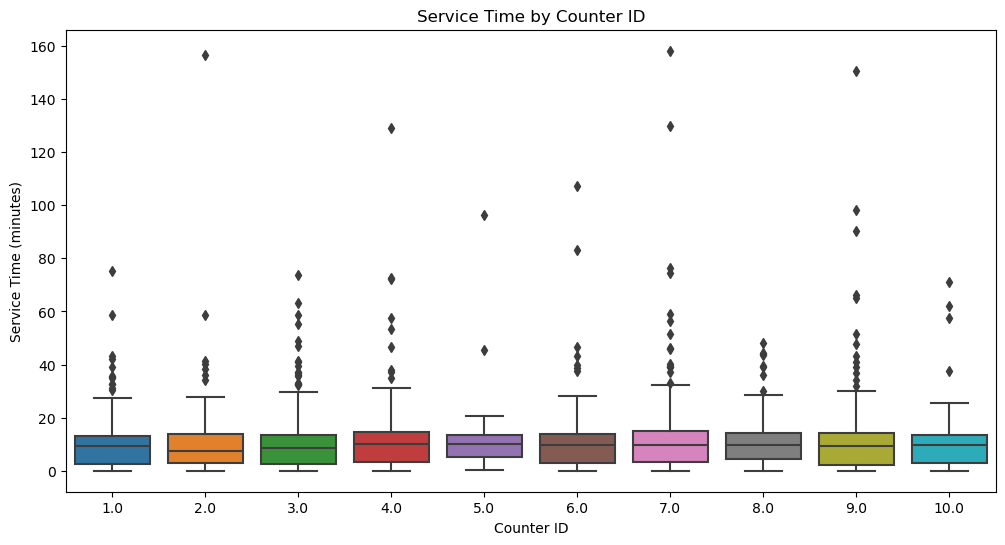

In [95]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='counter_id', y='service_time', data=final_df)
plt.title('Service Time by Counter ID')
plt.xlabel('Counter ID')
plt.ylabel('Service Time (minutes)')

Text(0, 0.5, 'Number of Customers Served')

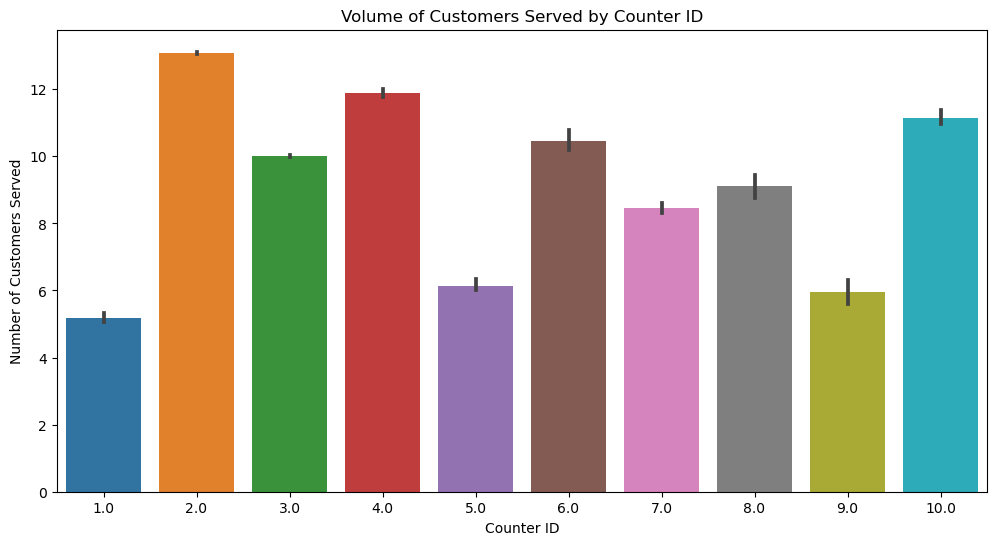

In [113]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x='counter_id', y='user_id', data=final_df)
plt.title('Volume of Customers Served by Counter ID')
plt.xlabel('Counter ID')
plt.ylabel('Number of Customers Served')

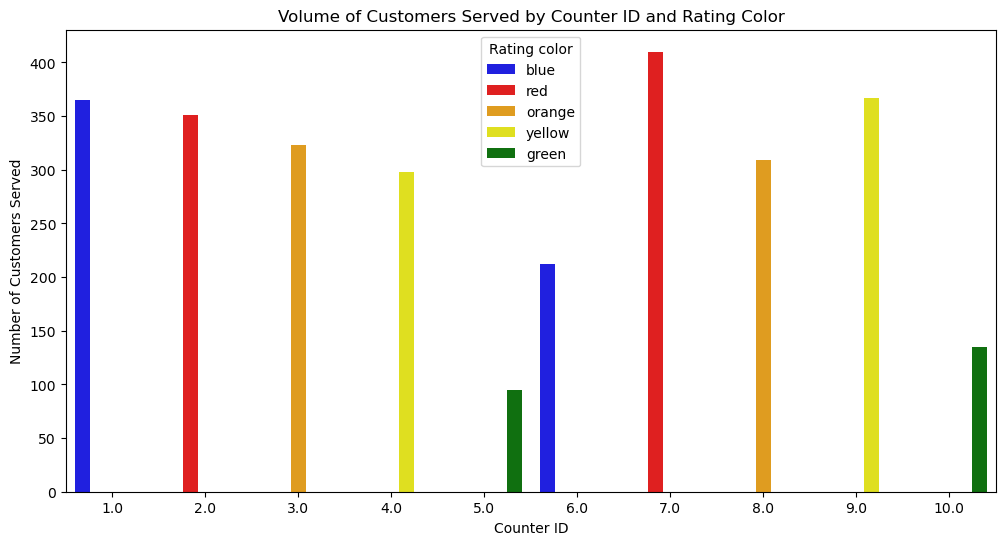

In [121]:
plt.rcParams['figure.figsize'] = (12, 6)
customers_served = final_df.groupby('counter_id')['user_id'].count().reset_index()
customers_served.columns = ['counter_id', 'num_customers_served']

customers_served['Rating color'] = ['blue', 'red', 'orange', 'yellow', 'green'] * (len(customers_served) // 5)
sns.barplot(x='counter_id', y='num_customers_served', hue='Rating color', data=customers_served, palette=['blue', 'red', 'orange', 'yellow', 'green', 'green'])
plt.title('Volume of Customers Served by Counter ID and Rating Color')
plt.xlabel('Counter ID')
plt.ylabel('Number of Customers Served')
plt.show()

Observation:
Counter ID from 5-6.5 and 10 are less served by the company

Descriptive Statistics

C:\Users\HP\AppData\Local\Temp\ipykernel_14004\3820405549.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_df.waiting_time, color="Red", shade=True)
C:\Users\HP\Downloads\jupyter1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Density')

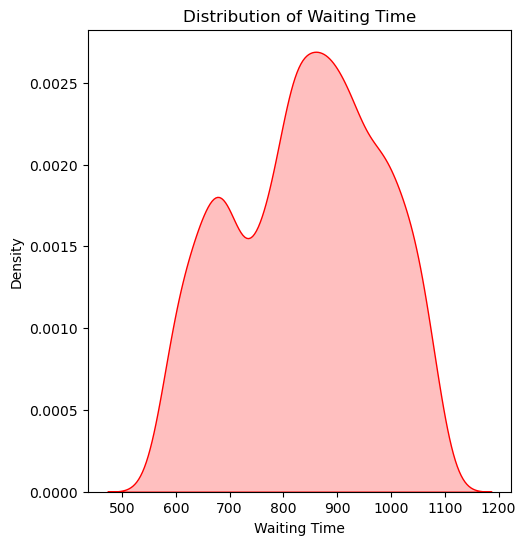

In [219]:
plt.subplot(1, 2, 1)
sns.kdeplot(final_df.waiting_time, color="Red", shade=True)
plt.title('Distribution of Waiting Time')
plt.xlabel('Waiting Time')
plt.ylabel('Density')

C:\Users\HP\AppData\Local\Temp\ipykernel_14004\3485937895.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_df.service_time, color="Blue", shade=True)
C:\Users\HP\Downloads\jupyter1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Density')

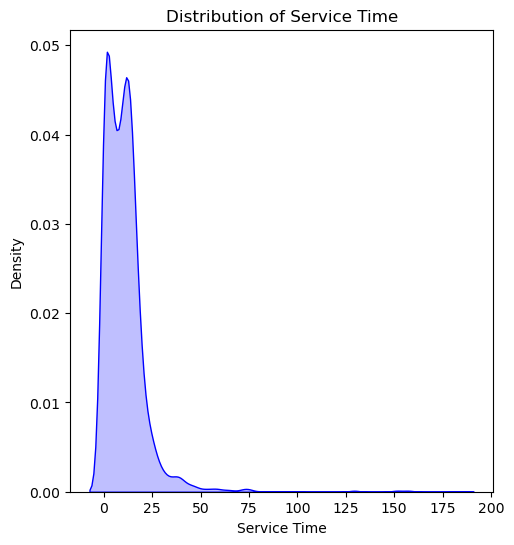

In [221]:
plt.subplot(1, 2, 2)
sns.kdeplot(final_df.service_time, color="Blue", shade=True)
plt.title('Distribution of Service Time')
plt.xlabel('Service Time')
plt.ylabel('Density')

Waiting Time Mean, Median and Std

In [236]:
waiting_time_mean = final_df['waiting_time'].mean()
waiting_time_median = final_df['waiting_time'].median()
waiting_time_std = final_df['waiting_time'].std()

In [242]:
waiting_time_mean

842.0052356020942

In [244]:
waiting_time_median

851.3666666666667

In [250]:
waiting_time_std

134.9108437059987

It indicates the extent to which individual waiting times deviate from the mean waiting time.

In [238]:
volume_customers = final_df.groupby('counter_id')['user_id'].count()
volume_customers_mean = volume_customers.mean()
volume_customers_median = volume_customers.median()
volume_customers_std = volume_customers.std()

Correlation (Numerical Attributes)

In [161]:
correlation = final_df['waiting_time'].corr(final_df['service_time'])
correlation

-0.036987338452977817

A correlation coefficient of -0.037 suggests a very weak negative linear relationship between waiting_time and service_time. 

In [168]:
corr_matrix = final_df[['waiting_time', 'service_time', 'counter_id']].corr()

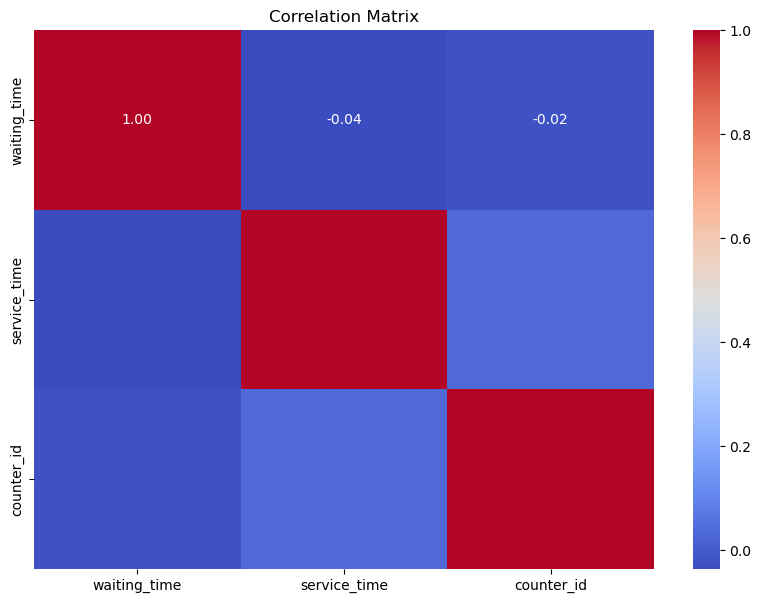

In [170]:
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Waiting time and service time: A strong correlation indicates that longer service times are associated with longer waiting times. A weak correlation suggests that service time has little impact on waiting time.

Waiting time and counter ID: A strong correlation implies that specific counters consistently have longer or shorter waiting times. A weak correlation suggests that counter ID has little influence on waiting time.

Service time and counter ID: A strong correlation indicates that certain counters tend to have longer or shorter service times. A weak correlation suggests that service times are relatively consistent across counters.